<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Charulata_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


To understand how the data structure looks like:




In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#for numerical variables:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#for categorical variables:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Lets visulaize the entire dataset:


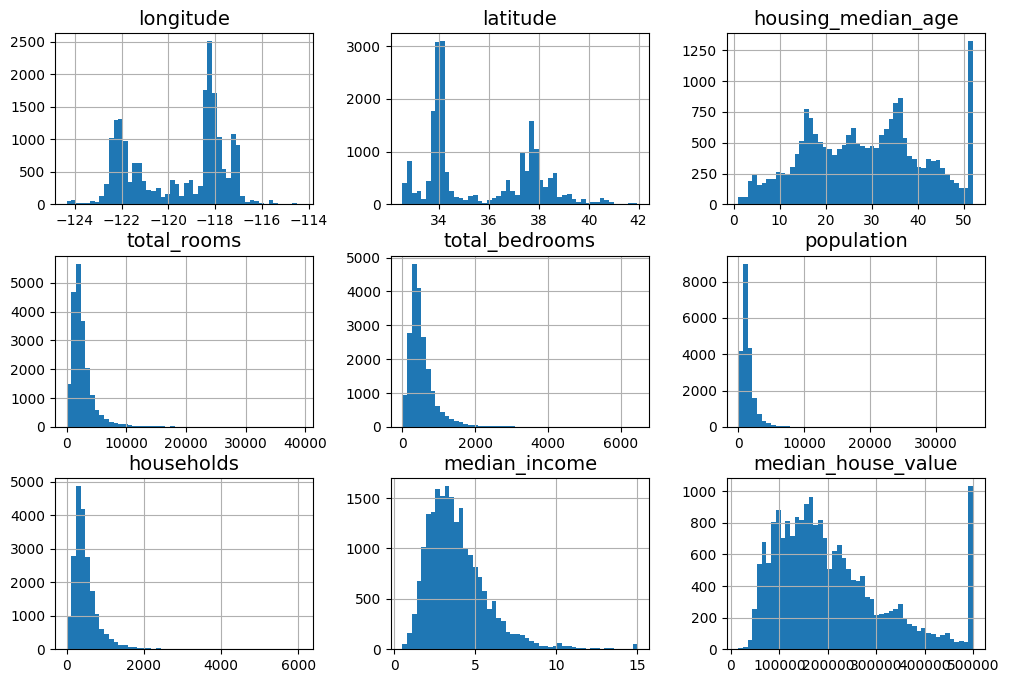

In [7]:
import matplotlib.pyplot as plt

#This is a hitogram for each numerical attribute:

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

Observations:
1. Many histograms are skewed right. This may make it a bit harder for some machine learning algorithms to detect patterns. Later, we will try transforming these attributes to have more symmetrical and bell-shaped distributions.
2. The median income attribute does not look like it is expressed in US dollars
(USD), it is actually capped at 15 (actually, 15.0001) for higher median
incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
$30,000).
3. Housing median age and the median house value are also capped.

**Creating a test set: **

In [8]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)
#RangeIndex: 20640 entries, 0 to 20639

16512

In [10]:
len(test_set)

4128

In [11]:
#To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:
np.random.seed(42)


**Advantages of Hash-Based Splitting:**
1. Reproducibility Across Different Runs:

Hash-based splitting ensures that the same data points consistently fall into the training and test sets across different runs, even if the data order changes.
In contrast, np.random.seed() ensures reproducibility **only if the order of data remains the same.** If the data order changes, the split will also change.

2. Consistency Across Different Systems:

Hash functions like crc32 produce the same output for the same input on any system, ensuring consistency across different environments.
np.random.seed() depends on the initial state of the random number generator, which might still lead to **slight variations across different systems or Python versions.**

3. Data Integrity:

When using a specific identifier (like an index or a combination of columns) for hashing, you can ensure that certain records always go to the same split, preserving data integrity.
This is particularly **useful for datasets with specific constraints, such as ensuring all data from the same user or session remain in the same split.**

4. Flexibility with Data Updates:

If your dataset is updated (e.g., more records are added),** hash-based splitting can easily accommodate the new records without disrupting the existing split.**
With np.random.seed(), adding new records might require recalculating the split, which could change the assignment of existing records.

5. Avoiding Randomness:

Hash-based splitting completely avoids the inherent randomness in the splitting process. This is beneficial when randomness needs to be minimized for specific applications.
np.random.seed() still introduces randomness; it's just controlled by the seed value.

---



**In short, While np.random.seed() is useful for controlling randomness in scenarios like shuffling data or generating random numbers, hash-based splitting provides a more robust and consistent method for splitting datasets, especially when dealing with updates, changes in data order, and ensuring reproducibility across different environments.**

---



**How Hash-Based Splitting Works:**

Identifier-Based Splitting:
By using an identifier (such as a unique ID, a combination of features, or an index), you ensure that the decision to include a record in the training or test set is deterministic.

The identifier is hashed, and the result is compared to the test ratio threshold to determine the split.

In [12]:
from zlib import crc32
from sklearn.model_selection import train_test_split


In [13]:
#is_id_in_test_set: This function determines if an identifier should be in the test set based on the provided test ratio. It uses the crc32 hash function to ensure consistent hashing.
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32


In [14]:
#split_data_with_id_hash: This function splits the dataset based on an identifier column and the test ratio. It applies the is_id_in_test_set function to each identifier.
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [15]:
#the dataset housing is reset to have an index column, which is then used to split the dataset into training and test sets using the split_data_with_id_hash function.
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")


In [16]:
#a new identifier id is created by combining longitude and latitude, which is then used to split the dataset.
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")


In [17]:
 #train_test_split function from sklearn with a fixed random state to ensure reproducibility. The dataset housing is split into training and test sets with 20% of the data in the test set.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [18]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


In [19]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN


Now, we are going to perform **Stratified sampling** , which ensures that the training and test sets have a similar distribution of categories, which is important for preserving the representativeness of the data.

We should apply stratified sampling during the dataset splitting process. This way, we can directly ensure that the stratification is respected in both the training and test sets.


---


**Why Stratified Sampling is Important:**

**Preserve Category Distribution**:

Ensures that the distribution of categories (e.g., income levels, classes) in the training and test sets reflects the distribution in the original dataset.
This is crucial for imbalanced datasets where some categories are underrepresented.

**Improve Model Performance:**

Helps in training more representative models because the training data accurately reflects the full dataset.
Ensures that the test set provides a fair evaluation of the model's performance.



In [20]:
#Creating Income Categories:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


The pd.cut function is used to segment and sort the median_income column of the housing DataFrame into discrete intervals (bins).

The bins parameter specifies the bin edges, creating the following categories:

0 to 1.5

1.5 to 3.0

3.0 to 4.5

4.5 to 6.0

Greater than 6.0

The labels parameter assigns labels (1, 2, 3, 4, 5) to these bins.

The new column income_cat is added to the DataFrame with these categorical values.

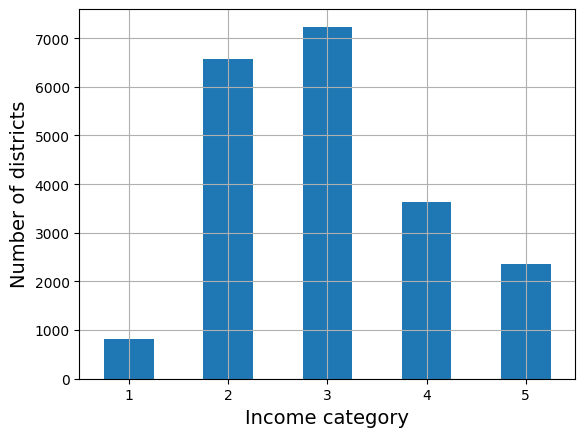

In [21]:
#Plotting the Income Categories:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

plt.show()


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)



In [23]:
# Verify the stratification
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))


income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


The **income_cat column** was created specifically for the purpose of stratified sampling. It helped ensure that the training and test sets had the same distribution of income categories as the original dataset.

 After performing the stratified split, the income_cat column is no longer needed for modeling and analysis. Dropping it cleans up the dataset, removing unnecessary columns that were only used temporarily.

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

***Discover and Visualize the Data to Gain Insights***


In [25]:
#This line will create a copy of the stratified training set (strat_train_set) and assign it to the variable housing.
#This is done to preserve the original training set while working with the copy.
housing = strat_train_set.copy()


**Visualizing Geographical Data**

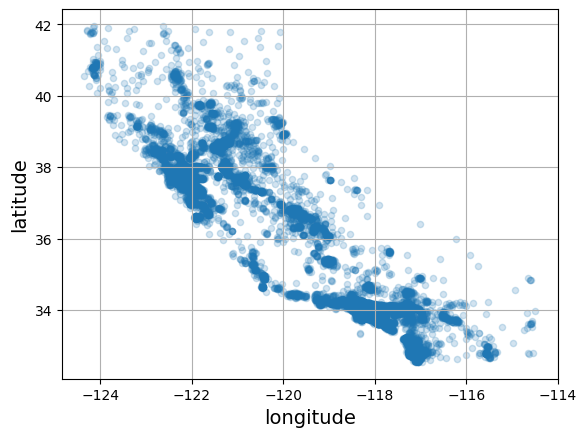

In [26]:
#Because the dataset includes geographical information (latitude and longitude), it is a good idea to create a scatterplot of all the districts to visualize the data
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

plt.show()

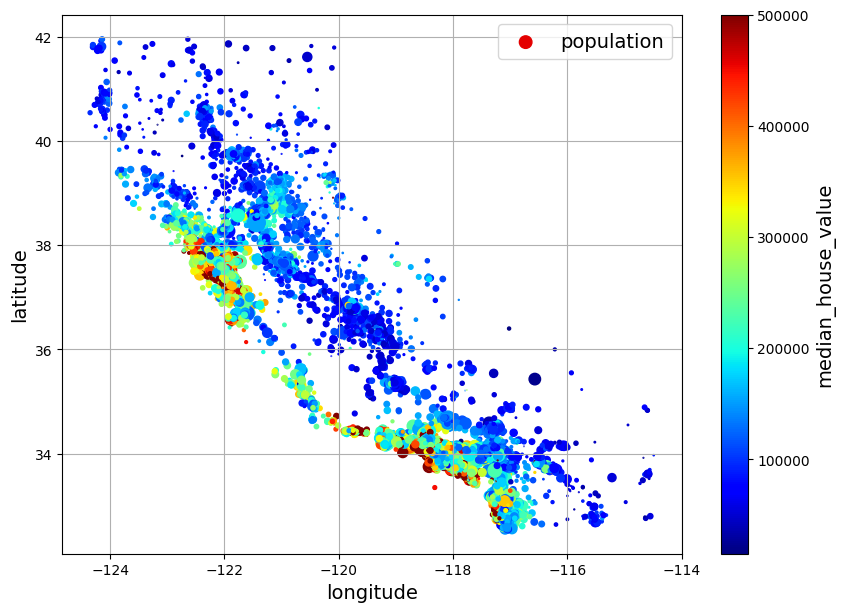

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

plt.show()

We are looking at the housing prices right now. The radius of each circle represents the district’s population, and the color represents the price. Here we have used a predefined color map (option cmap) called jet, which ranges from
blue (low values) to red (high prices)


---


So, the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density.


A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers.

---

A clustering algorithm is a type of unsupervised machine learning algorithm that groups a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters). Clustering is used for a variety of applications, including data analysis, pattern recognition, and image processing.

Types of clustering algorithm:
1. K-Means Clustering
2. Hierarchical Clustering
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**What help will be a clustering algorithm do here for us?**

*Detecting Key Areas:*

Clusters of High/Low Prices: Identify areas with high or low median house values.
Population Clusters: Find densely populated areas.
Feature Engineering:

*Proximity to Clusters:* Create new features measuring the distance of a data point to the nearest cluster center, which can be useful for predictive modeling.




In [28]:
#Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:
corr_matrix = housing.corr(numeric_only=True)

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1.

When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up.

When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency
to go down when you go north).

Coefficients close to 0 mean that there is no
linear correlation.

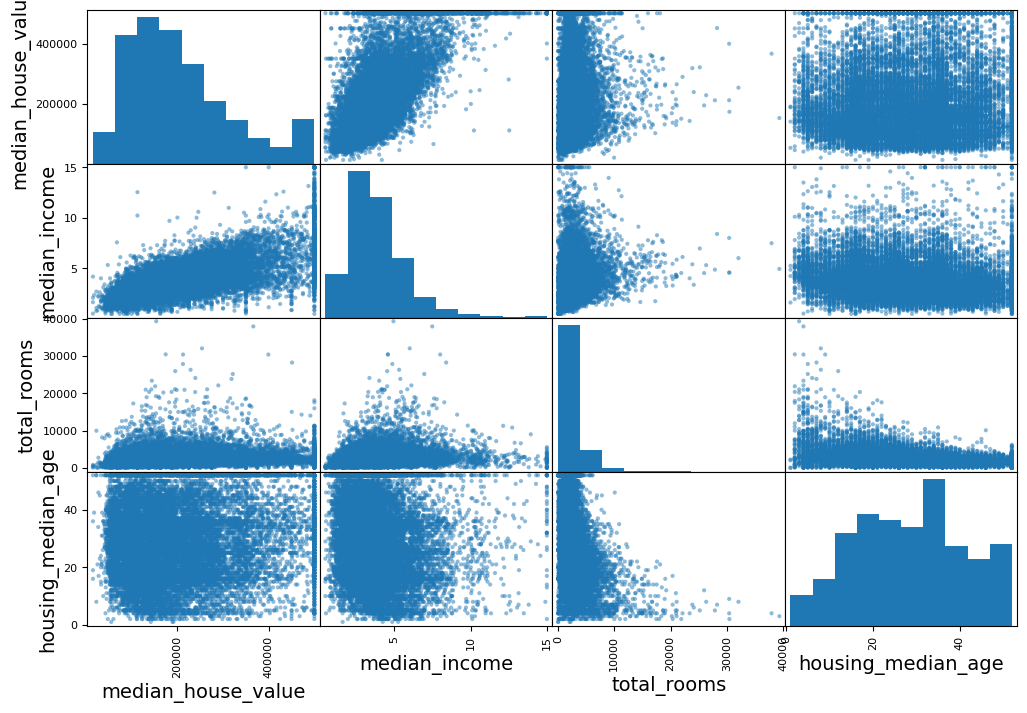

In [30]:
#This scatter matrix plots every numerical attribute against every other numerical attribute, plus a histogram of each numerical attribute’s values on the main diagonal (top left to bottom right)
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

plt.show()

**Off-Diagonal Subplots (Scatter Plots):**

**median_house_value vs median_income:** There is a clear positive correlation, indicating that higher median incomes are associated with higher median house values.

**median_house_value vs total_rooms:** There is a weaker positive correlation, suggesting that more rooms generally correlate with higher house values, but this relationship is not as strong as the one with income.

**median_house_value vs housing_median_age:** There is no clear correlation visible between the house values and the age of the houses.

The spread is quite even, showing that house value is relatively independent of house age in this dataset.

**median_income vs total_rooms:** There is a weak positive correlation, indicating that higher income areas tend to have houses with more rooms.

**median_income vs housing_median_age:** There is a slight indication that older houses are associated with lower median incomes, but this trend is not very strong.

**total_rooms vs housing_median_age**: There is no clear relationship visible between the total number of rooms and the age of the houses.

**Diagonal Subplots (Histograms):**

**median_house_value:** The histogram shows that most houses have median values below $300,000, with a noticeable peak around $100,000-$200,000.

**median_income:** The distribution of median income is right-skewed, with most values between 2 and 8.

**total_rooms:** The total number of rooms varies widely, with a concentration of values below 10,000.

**housing_median_age:** The distribution of housing median age shows that most houses are around 20-30 years old, with fewer very old or very new houses.



---

**Key Insights:**

**Strongest Correlation:** The strongest relationship observed is between median_house_value and median_income, highlighting the importance of income in determining house prices.

**Weak Correlations:** Relationships between house value and total rooms or house age are weaker, suggesting that other variables might be more influential.

**Distributions**: The individual distributions show typical patterns, such as the skewed income distribution and the concentration of house ages around 20-30 years.


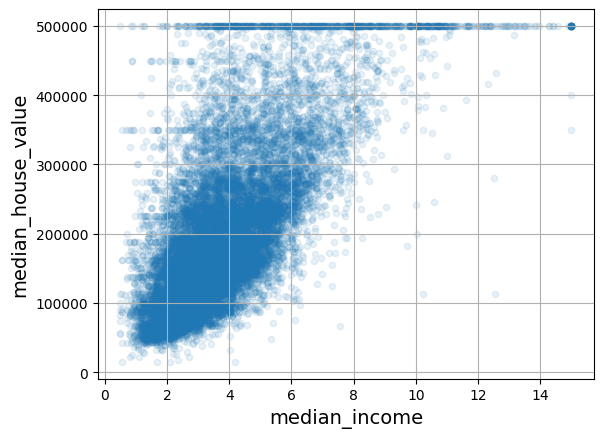

In [31]:
#Looking at the correlation scatterplots, it seems like the most promising attribute to predict the median house value is the median income, so let us zoom in on their scatterplot:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)

plt.show()

1. The correlation is indeed quite strong; you can clearly see the upward trend, and the points are not too dispersed.

2. The price cap is clearly visible as a horizontal line at $500,000.

3. The plot also reveals other less obvious straight lines a horizontal line
around 450,000 ,  350,000, perhaps one around $280,000, and a few more below that.

We can try removing the corresponding districts to prevent my algorithm
from learning to reproduce these data quirks.

# Experimenting with Attribute Combinations

Attribute combinations are important in data analysis and machine learning because they can reveal relationships and patterns that are not apparent when looking at individual attributes alone. By creating new features from existing ones, you can often improve the performance of your models and gain deeper insights into the data.

In [32]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [33]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

Summary of Findings:

Strongest Correlation: median_income (0.688380) remains the strongest predictor of median_house_value.

New Features:
rooms_per_house (0.143663) shows a meaningful relationship with house value.

bedrooms_ratio (-0.256397) shows a notable negative correlation, indicating that higher ratios might be associated with lower house values.

Weak Predictors: Some features, like population and people_per_house, have very low or negative correlations, suggesting they might not be useful predictors on their own.

# Prepare the Data for Machine Learning Algorithms

1. We will create a dataset (housing) that contains all the features except the
target variable (median_house_value).

2. We will create a separate Series (housing_labels) that contains only the target variable (median_house_value).





In [34]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

**Why This is Important:**

Feature and Target Separation:

Machine Learning Models: When training machine learning models, it is essential to separate the input features (used for making predictions) from the target variable (the value to be predicted). This ensures that the model does not inadvertently learn from the target values directly, which would lead to overfitting.

Data Integrity:

Creating Copies: Using the copy() method ensures that any modifications to housing_labels do not affect the original strat_train_set. This is important for maintaining data integrity and ensuring reproducibility of the analysis.

In [35]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [36]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

Since the "total_bedrooms" has 44 missing values (checked earlier), we will try to replace it with median.

**Why not use Mean?**

**1.Robustness to Outliers:**

Median: The median is the middle value of a dataset when it is ordered from
lowest to highest. It is not affected by outliers or extreme values.

Mean: The mean is the average of all values. It can be heavily influenced by outliers, which can distort the representation of the central tendency.

Mode: The mode is the most frequently occurring value. While useful in some cases, it may not represent the central tendency well, especially in continuous data with a wide range of values.

Example: Consider a dataset of total_bedrooms values: [2, 3, 3, 4, 100]. The mean would be (2+3+3+4+100)/5 = 22.4, which does not accurately reflect the typical number of bedrooms. The median is 3, which is a much more accurate representation.


**2. Better Representation of Skewed Data:**

Median: For skewed distributions (where data is not symmetrically distributed), the median provides a better measure of central tendency than the mean.

Mean: In skewed data, the mean can be pulled in the direction of the skew, giving a less accurate reflection of the dataset's typical value.

Example: In a right-skewed distribution of house prices or number of bedrooms, most values are clustered towards the lower end, with a few high values. The median will be at the center of the majority of values, whereas the mean will be higher due to the influence of the high values.


**Why not use Mode?**

**1. Applicability to Continuous Data:**

 In continuous data, especially in a large dataset, each value may be unique or occur very few times, making the mode less representative of the dataset. It is better suitable for categorical data.

**2. Representation of Central Tendency:**

Central Tendency: The median and mean provide measures of central tendency that are more meaningful for continuous data. The mode may not capture the central tendency accurately in such datasets.

**3. Practical Utility:**

Mode in Sparse Data: In cases where the mode is not clearly defined (e.g., in datasets where no single value repeats or the most frequent value is an outlier), using the mode can lead to misleading imputations.

Distribution of Data: The mode can sometimes represent a local peak rather than the overall central trend of the data, especially in multimodal distributions (where there are multiple peaks).






**Why Use SimpleImputer?**

**Consistency Across Data Splits:**

Training, Validation, and Test Sets: By using SimpleImputer, the median values are computed and stored once during the fitting process. This ensures that the same median values are used consistently across the training set, validation set, test set, and any new data.

New Data: When new data is fed into the model, the same median values used during training are applied to handle missing values, ensuring consistency.


**Automation and Reusability:**

Reusable Process: SimpleImputer remembers how to fill in missing values, so you don't have to redo the work every time you get new data.

Pipeline Integration: It can be part of a bigger data preparation process, ensuring that missing values are always handled the same way, making your machine learning workflow smooth and consistent.

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the "median" strategy (as it cannot be calculated on text attributes like ocean_proximity):

In [38]:
housing_num = housing.select_dtypes(include=[np.number])

In [39]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

We can also check if this is the same as manually computing the median of each attribute:

In [41]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Transform the training set:

In [42]:
#Checks for any missing values across each row (axis=1) in the housing_num DataFrame. It creates a boolean index where True indicates a row with at least one missing value.
null_rows_idx = housing_num.isnull().any(axis=1)
null_rows_idx

13096    False
14973    False
3785     False
14689    False
20507    False
         ...  
14207    False
13105    False
19301    False
19121    False
19888    False
Length: 16512, dtype: bool

In [43]:
#housing_num DataFrame is stored in X, which is a NumPy array by replacing missing values with the precomputed median values.
X = imputer.transform(housing_num)

In [44]:
#Check Feature Names: to ensure correct features are included:
imputer.feature_names_in_


array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [45]:
#Converting the transformed NumPy array X back into a Pandas DataFrame with the same column names and index as the original housing_num DataFrame.
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)


In [46]:
#verify that the missing values have been correctly filled
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


# Removing the outliers:


**What is Isolation Forest?**

Isolation Forest is a machine learning algorithm designed to find outliers (unusual data points) in a dataset. It works by trying to "isolate" each data point. The idea is that outliers are easier to isolate because they are different from most of the other points.


**How Does It Work?**

**Isolation Trees:**

The algorithm creates many decision trees. Each tree is built by randomly selecting a feature (like a column in your dataset) and then randomly choosing a value to split the data on that feature.
The process of randomly splitting the data continues until each data point is isolated (i.e., each data point ends up in its own leaf).

**Path Length:**

For each data point, the algorithm counts how many splits (or steps) it takes to isolate it in each tree.
Outliers, being different, generally get isolated quickly, so they have shorter paths.
Normal points take more steps to get isolated, resulting in longer paths.

**Scoring:**

The algorithm calculates an average path length for each data point across all trees.
A shorter average path length means the point is likely an outlier.


**Why Use Isolation Forest?**

Efficiency:
It's fast and works well with large datasets.

No Assumptions:
It doesn't assume any specific distribution of the data, making it versatile.

Scalability:
It handles high-dimensional data (data with many features) effectively.


**Interpreting the Results:**

outlier_pred: An array where each element is:


*   1 if the point is considered normal.
*   -1 if the point is considered an outlier.





In [47]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [48]:
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [49]:
housing = housing.iloc[outlier_pred == 1]
housing_labels = housing_labels.iloc[outlier_pred == 1]

# Handling Categorical Attributes

In [50]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN
20615,INLAND


In [51]:
#We will import the OrdinalEncoder class from Scikit-Learn's preprocessing module and create an instance of it. OrdinalEncoder is used to convert categorical values into numerical values (integers).
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [1.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [52]:
#We will see the unique categories found by the OrdinalEncoder during the fitting process, in the order they were encoded.
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The output array shows the unique categories that were present in the ocean_proximity column and the order in which they were encoded. For example:

<1H OCEAN is encoded as 0.

INLAND is encoded as 1.

ISLAND is encoded as 2.

NEAR BAY is encoded as 3.

NEAR OCEAN is encoded as 4.

This list contains 1D array of categories for each categorical variable, which in this case is a list containing a single array since there is just one categorical attribute. For example, "NEAR BAY" might be encoded as 3, "<1H OCEAN" as 0, etc.



---

But, One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases
(e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is
obviously not the case for the ocean_proximity column (for example, categories 0
and 4 are clearly more similar than categories 0 and 1).

So, common
solution is to create one binary attribute per category: one attribute equal to 1 when
the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the
category is "INLAND" (and 0 otherwise), and so on. This is called **one-hot encoding,**
because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

The new attributes are sometimes called **dummy attributes**

**One-Hot Encoding:**




In [53]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

By default, the output of a OneHotEncoder is a SciPy sparse matrix, instead of a
NumPy array, hence we have set sparse=False when creating the OneHotEncoder, in which case the transform() method will return a regular (dense) NumPy array directly.

In [54]:
#list of categories:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Get dummies by Pandas vs One Hot encoder by Sklearn:**


Pandas has a function called get_dummies(), which also converts each categorical
feature into a one-hot representation, with one binary feature per category.

In [55]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test).astype(int)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


Let us try One Hot Encoding now:

In [56]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

See the difference? get_dummies() saw only two categories, so it output two columns,
whereas OneHotEncoder output one column per learned category, in the right order.

So, what we can learn from here is: OneHotEncoder remembers which categories it was trained
on. This is very important because once your model is in production, it should be
fed exactly the same features as during training: no more, no less.

---



In [57]:
#shows the input feature names
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [58]:
#provides the output feature names after encoding
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

# Feature Scaling:

Feature scaling is about making sure all your data features (like height, weight, age) are on the same scale.


**Ensures Features Contribute Equally:**
In distance-based algorithms like K-Nearest Neighbors (KNN) and clustering algorithms (e.g., K-means), unscaled features with larger ranges can disproportionately influence the results.
Scaling ensures that each feature contributes equally to the distance calculations.

**Prevents Numerical Instability:**
In some algorithms, having features with vastly different ranges can lead to numerical instability.
Scaling helps in maintaining numerical stability by keeping feature values within a reasonable range.

**Improves Convergence Speed in Gradient-Based Algorithms:**
Algorithms like gradient descent, used in neural networks and logistic regression, converge faster when the features are on a similar scale.
Without scaling, features with larger values dominate the computation, causing the algorithm to oscillate and converge slowly.




---



Difference Between Min-Max Scaling and Standardization:

**1. Min-Max Scaling (Normalization):**

Min-max scaling (many people call this normalization) is the simplest: for each
attribute, the values are shifted and rescaled so that they end up ranging from
0 to 1.

This is performed by subtracting the min value and dividing by the difference
between the min and the max.

Scikit-Learn provides a transformer called
MinMaxScaler for this. It has a feature_range hyperparameter that lets you change
the range if, for some reason, you don’t want 0–1.

**Effect:**

Transforms all features to lie within the range [0, 1].
Sensitive to outliers because it uses the min and max values.

**Usage:**

Useful when the data has a known range and you want to scale it to a fixed interval.
Commonly used in algorithms like Neural Networks that require data to be within a specific range.

**2. Standardization (Z-score Normalization):**

First it subtracts the mean value (so standardized values
have a zero mean), then it divides the result by the standard deviation (so standardized
values have a standard deviation equal to 1).

**Effect:**

Centers the data around 0 with a standard deviation of 1.
Less sensitive to outliers compared to Min-Max scaling.

**Usage:**

Useful when the data does not have a known range.
Commonly used in algorithms like Support Vector Machines (SVM) and Principal Component Analysis (PCA) that assume normally distributed data.

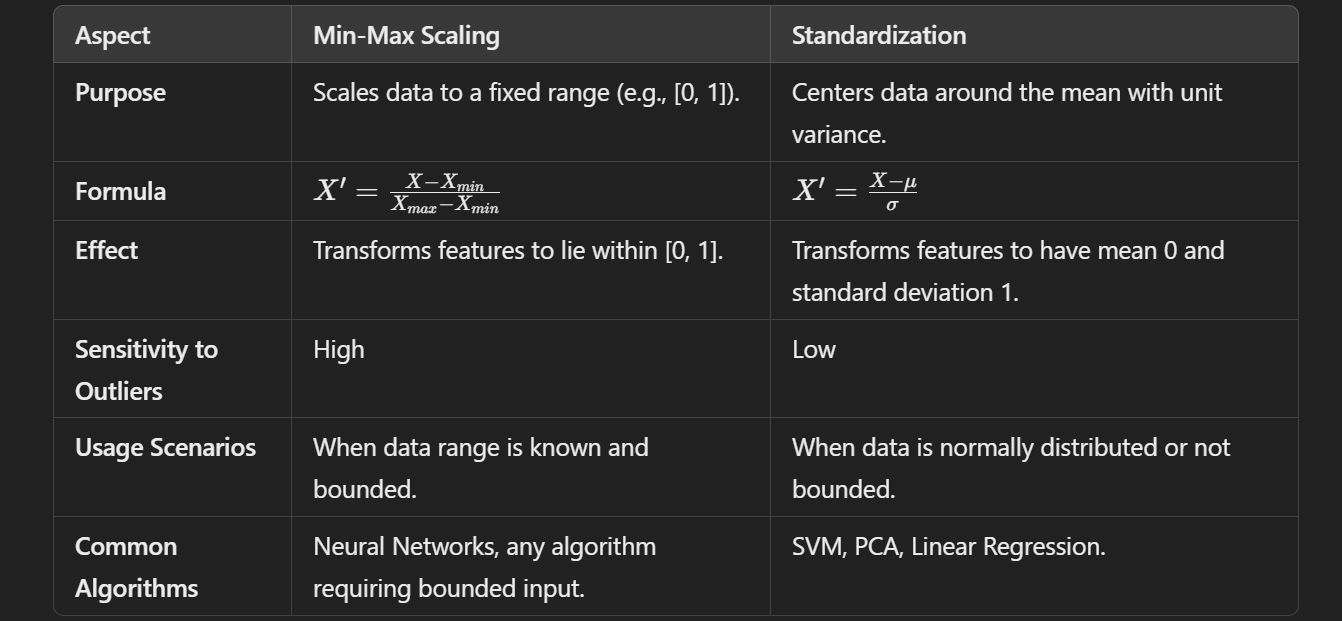


In [59]:
#from sklearn.preprocessing import MinMaxScaler

#min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
#housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [60]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

**What to do when you have a really long and heavy tail?**

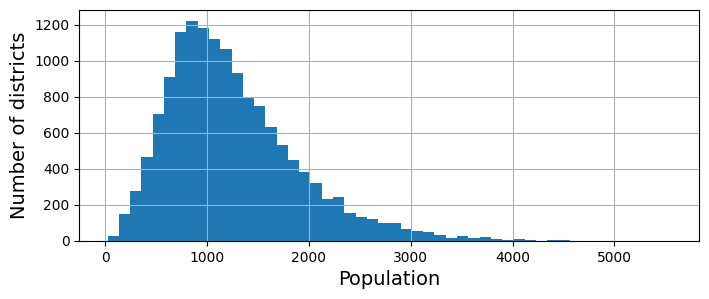

In [61]:
fig, ax = plt.subplots(figsize=(8, 3))
housing["population"].hist(ax=ax, bins=50)

ax.set_xlabel("Population")
ax.set_ylabel("Number of districts")

plt.show()

Here are several techniques to handle features with heavy tails:

**1.  Log Transformation:**
Apply a logarithmic transformation to reduce the skewness of the distribution.
Suitable for positive features.

Formula:
𝑋
′
=
log
⁡
(
𝑋+
1
)
X
′
 =log(X+1)

Example: If the feature values are [1, 10, 100, 1000], the log-transformed values would be [0.69, 2.39, 4.61, 6.91].

**2. Square Root Transformation:**
Use a square root transformation to reduce the impact of the long tail.
Suitable for positive features.

Formula:
𝑋
′
=
𝑋
X
′
 =
X
​

Example: If the feature values are [1, 4, 9, 16], the square root-transformed values would be [1, 2, 3, 4].

**3. Power Transformation:**

Raise the feature to a power between 0 and 1 to reduce skewness.

Formula:
𝑋
′
=
𝑋
𝛼
X
′
 =X
α
 , where
0
<
𝛼
<
1
0<α<1.

Example: If the feature values are [1, 10, 100, 1000] and
𝛼
=
0.5
α=0.5, the transformed values would be [1, 3.16, 10, 31.62].

**4. Bucketing (Binning):**

Divide the continuous variable into discrete bins.

Reduces the impact of outliers by grouping values into bins.

Example: Age can be bucketed into bins like [0-10], [11-20], [21-30], etc.

**5. Clipping:**

Limit the range of values by capping at a maximum value or floor at a minimum value.

Example: Clip feature values to lie within a specific range, e.g., [0, 100].

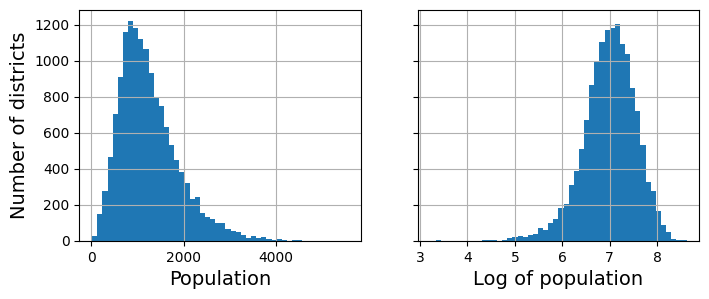

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")

plt.show()

# Multimodal Distribution:

**Bucketizing:**

This method involves splitting the feature into discrete bins or buckets, treating each bucket as a separate category. These categories can then be encoded using techniques like OneHotEncoder.

Example: Houses built around 35 years ago may be in one bucket.

<ipython-input-63-765f088c771e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['age_binned'] = pd.cut(housing['housing_median_age'], bins=[0, 10, 20, 30, 40, 50, np.inf], labels=[1, 2, 3, 4, 5, 6])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,age_binned
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,4
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,4
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,4
1286,-121.31,37.96,52.0,1829.0,301.0,694.0,319.0,3.3466,INLAND,6


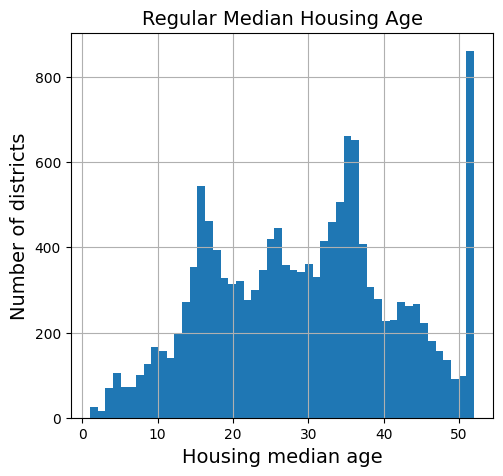

In [63]:
# Plotting the regular median housing age
plt.figure(figsize=(12, 5))

# Regular median housing age histogram
plt.subplot(1, 2, 1)
housing['housing_median_age'].hist(bins=50)
plt.xlabel("Housing median age")
plt.ylabel("Number of districts")
plt.title("Regular Median Housing Age")

# Bucketizing the 'housing_median_age' into 5 bins
housing['age_binned'] = pd.cut(housing['housing_median_age'], bins=[0, 10, 20, 30, 40, 50, np.inf], labels=[1, 2, 3, 4, 5, 6])
housing.head()

In [64]:
# One-Hot Encoding the binned feature
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
housing_binned_encoded = encoder.fit_transform(housing[['age_binned']])

In [65]:
# Convert the encoded features to a DataFrame
housing_binned_df = pd.DataFrame(housing_binned_encoded, columns=encoder.get_feature_names_out(['age_binned']))
housing_binned_df

,age_binned_1,age_binned_2,age_binned_3,age_binned_4,age_binned_5,age_binned_6
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
14443,0.0,0.0,0.0,0.0,1.0,0.0
14444,0.0,0.0,1.0,0.0,0.0,0.0
14445,0.0,1.0,0.0,0.0,0.0,0.0
14446,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
housing_columns = housing.columns.tolist()
housing_binned_df_columns = housing_binned_df.columns.tolist()
housing_all_columns=housing_columns+housing_binned_df_columns

In [67]:
housing_np=housing.to_numpy()
housing_binned_df_np=housing_binned_df.to_numpy()
housing_stacked=np.hstack((housing_np,housing_binned_df_np))
housing_stacked

array([[-118.38, 34.14, 40.0, ..., 1.0, 0.0, 0.0],
       [-121.98, 38.36, 33.0, ..., 1.0, 0.0, 0.0],
       [-117.11, 33.75, 17.0, ..., 0.0, 0.0, 0.0],
       ...,
       [-117.06, 32.59, 13.0, ..., 0.0, 0.0, 0.0],
       [-118.4, 34.06, 37.0, ..., 1.0, 0.0, 0.0],
       [-122.41, 37.66, 44.0, ..., 0.0, 1.0, 0.0]], dtype=object)

In [68]:
housing_df=pd.DataFrame(housing_stacked,columns=housing_all_columns)

housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,age_binned,age_binned_1,age_binned_2,age_binned_3,age_binned_4,age_binned_5,age_binned_6
0,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,4,0.0,0.0,0.0,1.0,0.0,0.0
1,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,INLAND,4,0.0,0.0,0.0,1.0,0.0,0.0
2,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2,0.0,1.0,0.0,0.0,0.0,0.0
3,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,4,0.0,0.0,0.0,1.0,0.0,0.0
4,-121.31,37.96,52.0,1829.0,301.0,694.0,319.0,3.3466,INLAND,6,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-118.4,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,5,0.0,0.0,0.0,0.0,1.0,0.0
14444,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,3,0.0,0.0,1.0,0.0,0.0,0.0
14445,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,2,0.0,1.0,0.0,0.0,0.0,0.0
14446,-118.4,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,4,0.0,0.0,0.0,1.0,0.0,0.0


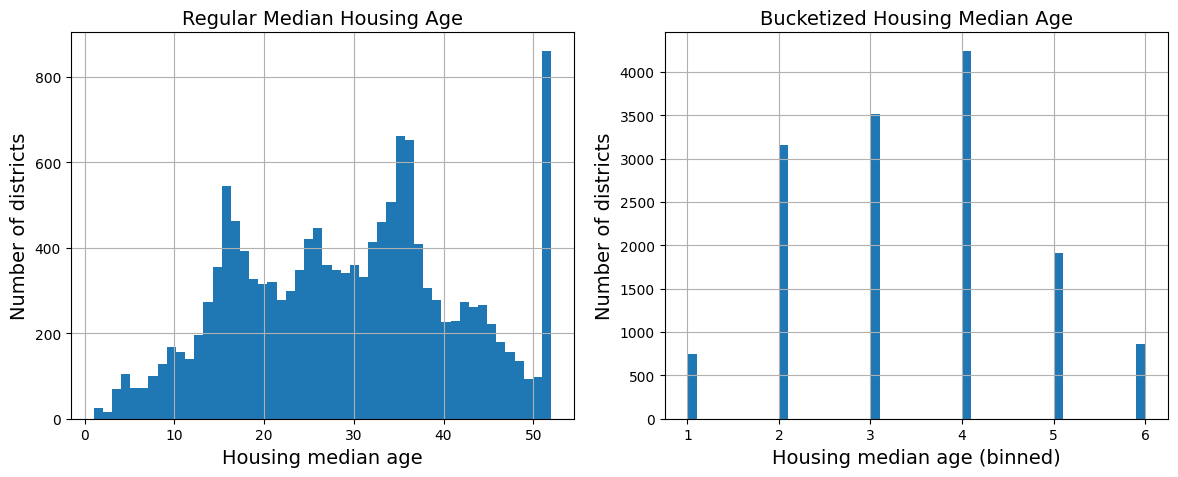

In [69]:
# Plotting the regular median housing age
plt.figure(figsize=(12, 5))

# Regular median housing age histogram
plt.subplot(1, 2, 1)
housing['housing_median_age'].hist(bins=50)
plt.xlabel("Housing median age")
plt.ylabel("Number of districts")
plt.title("Regular Median Housing Age")


# Bucketized housing median age histogram
plt.subplot(1, 2, 2)
housing['age_binned'].hist(bins=50)
plt.xlabel("Housing median age (binned)")
plt.ylabel("Number of districts")
plt.title("Bucketized Housing Median Age")

plt.tight_layout()
plt.show()

In [70]:
housing_df.drop(columns=['age_binned', 'age_binned_1', 'age_binned_2', 'age_binned_3', 'age_binned_4', 'age_binned_5', 'age_binned_6'], inplace=True)

**Radial Basis Function (RBF) Transformation:**

**What is RBF Transformation?**

RBF Transformation: This  is a technique used to create new features from existing data that measure how similar the values of an existing feature are to a specific fixed point (mode). It helps us understand how similar a data point is to a specific value.



**Why Use RBF Transformation?**

It helps the model to understand different rules for different ranges of the feature values.

**Gaussian RBF:**

Gaussian RBF: This is a specific type of RBF where the similarity between values decreases exponentially as they move away from the fixed point.

**Formula:**
The similarity is calculated using the formula:




similarity=exp(−γ(x−35)
2
 )

𝑥: The value of the feature.

35: The fixed point (mode) we are comparing the values to.

𝛾
(Gamma): A parameter that controls how quickly the similarity decreases as
𝑥
x moves away from 35.


**Understanding Gamma (
𝛾
):**

Gamma (
𝛾
): This parameter determines the rate at which similarity decreases. A larger gamma value makes the similarity drop faster as the value moves away from the fixed point.






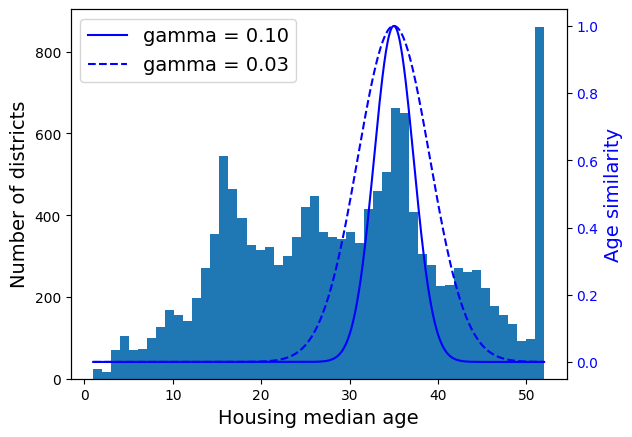

In [71]:
from sklearn.metrics.pairwise import rbf_kernel
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")

plt.show()


Interpretation:

**Gamma = 0.10 (Solid Blue Line)**

This line represents the similarity when gamma is set to 0.10.

The peak of the line is at the median age of 35, meaning this is the fixed point where similarity is 1 (highest).

The similarity drops quickly as you move away from 35, showing a steep decline.
This means that ages closer to 35 are considered very similar, while ages further away quickly become dissimilar.

**Gamma = 0.03 (Dashed Blue Line)**

This line represents the similarity when gamma is set to 0.03.

The peak is also at the median age of 35.

The decline is more gradual compared to the solid blue line.
This means that ages even slightly further from 35 are still considered somewhat similar.

**Interpretation**

Comparing the Two Gamma Values:

**Higher Gamma (0.10):** Results in a steep drop in similarity. Only ages very close to 35 are considered similar.

**Lower Gamma (0.03):** Results in a more gradual decline. A wider range of ages around 35 are considered similar.

**Practical Implication:**

If we want the model to be very sensitive to changes in age (i.e., only ages very close to 35 are considered similar), we use a higher gamma.

If we want the model to be less sensitive to changes in age (i.e., ages within a broader range around 35 are considered similar), we use a lower gamma.

**Scaling Target Variables:**

When you are training a machine learning model, sometimes you need to scale your target labels (the values you are trying to predict). **Scikit-Learn** offers tools to do this efficiently and ensure predictions are scaled back to their original form.

Why are we scaling the target variable?

**1. Improving Model Performance**

Model Convergence: Some machine learning algorithms, especially gradient-based methods, converge faster and more reliably when the target variable is scaled. This is because the optimization algorithms work more efficiently when the data values are within a certain range.

Handling Large Variances: When the target variable has a large variance, scaling it can help the model learn more effectively. Without scaling, the model might struggle to capture the patterns in the data accurately.

**2. Normalization of Features and Targets**

Consistency: When both features and targets are on a similar scale, it helps the model understand the relationship between them better. If the feature values are small and the target values are large, the model might give undue importance to the target variable, leading to poor performance.

Comparability: Scaling makes the target variable comparable to the scaled features, aiding the learning process of the model.


*Consider predicting house prices:*

Without Scaling: House prices might range from $100,000 to $1,000,000, which can have large variances.

With Scaling: By scaling the house prices, the model can more effectively learn the relationship between the input features (like number of rooms, location) and the target variable (price).


**1. StandardScaler Method:**

This involves manually scaling the target labels before training the model and then scaling back the predictions to the original scale.

Useful for understanding the process of scaling and inverse transforming.

We use inverse_transform: Converts the scaled predictions back to the original scale


**2. TransformedTargetRegressor Method:**

Automates scaling and inverse transforming of labels.

Simplifies the code and reduces the chance of errors.



In [72]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

#TransformedTargetRegressor: This wraps the regression model and the transformer (scaler). It ensures that labels are scaled before training and predictions are inverse-transformed back to the original scale.
#fit: Fits the model using the original labels (not scaled).

some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=StandardScaler()
)
model.fit(housing[["median_income"]], housing_labels)

#predict: The method automatically handles scaling and inverse-transforming of predictions.
predictions = model.predict(some_new_data)


In [73]:
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)
predictions

array([307649.58358784, 143451.50154782, 135759.63057829, 192702.83891231,
       184498.77560018])

# Custom Transformations:

In [74]:
import tarfile
import urllib.request
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

In [75]:
# Binning for 'median_income'
housing['income_bin'] = pd.cut(housing['median_income'],
                               bins=[0, 2, 4, 6, 8, 10, np.inf],
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High'])


<ipython-input-75-c0ac34b894eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['income_bin'] = pd.cut(housing['median_income'],


<ipython-input-76-4e84c4d3a87d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income_bin', data=housing, palette='viridis', order=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High'])


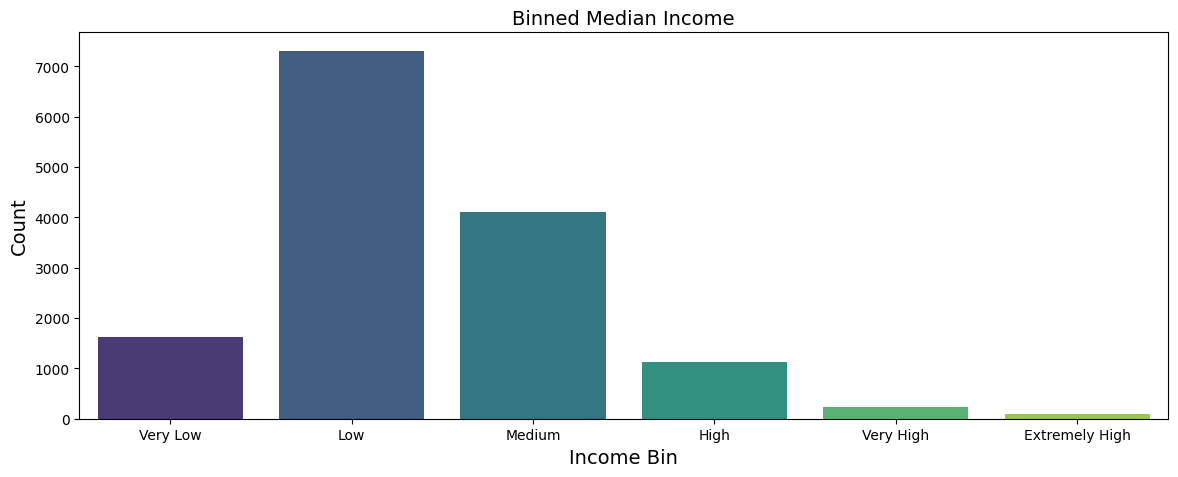

In [76]:
import seaborn as sns
plt.figure(figsize=(12, 5))
sns.countplot(x='income_bin', data=housing, palette='viridis', order=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High'])
plt.title('Binned Median Income')
plt.xlabel('Income Bin')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Log Transformation:** Apply a logarithmic transformation to the median_income feature.

np.log1p applies the natural logarithm (log) to the feature, adding 1 to avoid issues with log(0). This transformation helps to normalize the distribution of income values, especially if it has a heavy tail.

In [77]:
from sklearn.preprocessing import FunctionTransformer

#Log Transformation: Apply a logarithmic transformation to the median_income feature.

# Define the log transformer
log_transformer = FunctionTransformer(np.log1p)

# Apply the log transformer to 'median_income'
housing['log_median_income'] = log_transformer.transform(housing[['median_income']])


<ipython-input-77-fb8b8fd83646>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['log_median_income'] = log_transformer.transform(housing[['median_income']])


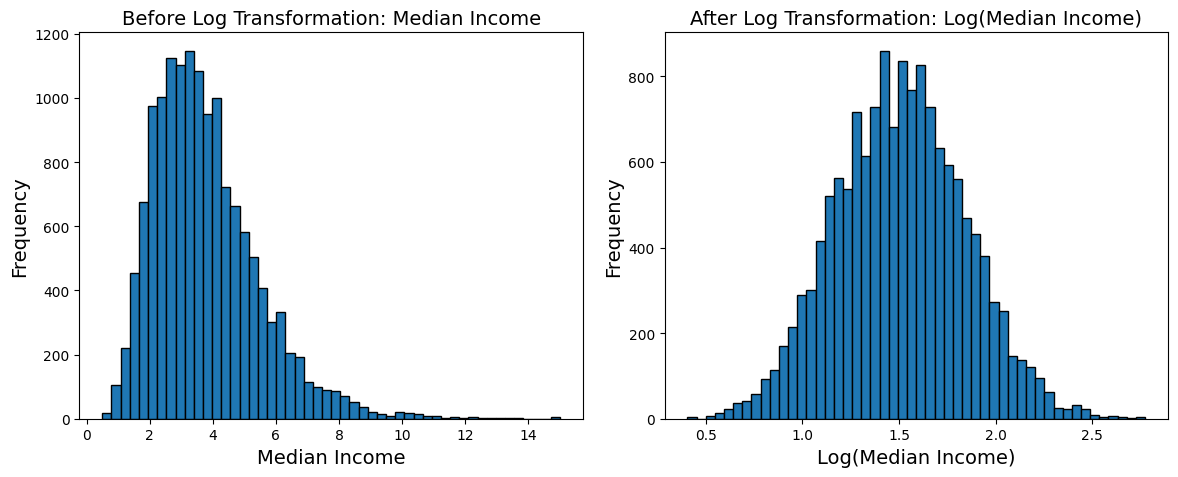

In [87]:
import matplotlib.pyplot as plt

# Before transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(housing['median_income'], bins=50, edgecolor='black')
plt.title('Before Log Transformation: Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')

# After transformation
plt.subplot(1, 2, 2)
plt.hist(housing['log_median_income'], bins=50, edgecolor='black')
plt.title('After Log Transformation: Log(Median Income)')
plt.xlabel('Log(Median Income)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Usefulness of custom transformation:**

Normalizing the distribution of the data.

Reducing the impact of outliers.

Improving the performance and stability of machine learning models.

Enhancing the interpretability of model coefficients.

**Ratio Transformation:** Compute the ratio of total_rooms to households

This transformation computes the ratio of total_rooms to households, creating a new feature that indicates the average number of rooms per household. This can be an important feature for predicting house prices.

In [79]:
from sklearn.preprocessing import FunctionTransformer

# Define a transformer that calculates the ratio of 'total_rooms' to 'households'
ratio_transformer = FunctionTransformer(lambda X: X[:, 0] / X[:, 1])

# Apply the ratio transformer
housing['rooms_per_household'] = ratio_transformer.transform(housing[['total_rooms', 'households']].values)


<ipython-input-79-597de80e26ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['rooms_per_household'] = ratio_transformer.transform(housing[['total_rooms', 'households']].values)


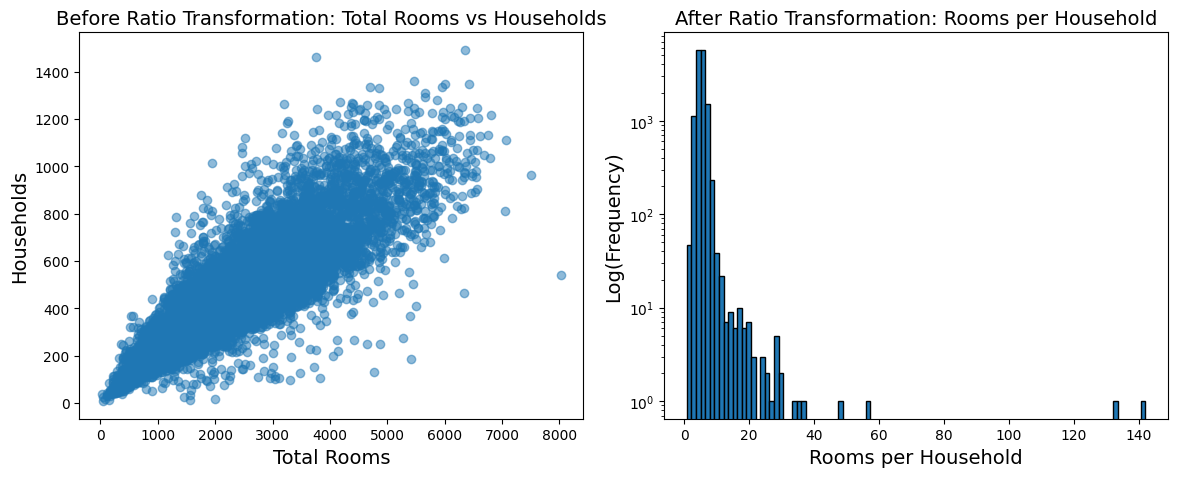

In [80]:
# Before transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(housing['total_rooms'], housing['households'], alpha=0.5)
plt.title('Before Ratio Transformation: Total Rooms vs Households')
plt.xlabel('Total Rooms')
plt.ylabel('Households')

# After transformation
plt.subplot(1, 2, 2)
plt.hist(housing['rooms_per_household'], bins=100, edgecolor='black', log=True)
plt.title('After Ratio Transformation: Rooms per Household')
plt.xlabel('Rooms per Household')
plt.ylabel('Log(Frequency)')

plt.tight_layout()
plt.show()


**Relationship Before Transformation:**

Positive Correlation: There is a clear positive correlation between the total number of rooms and the number of households. This means that districts with more rooms generally have more households.

Linear Trend: The scatter plot shows a roughly linear trend, indicating that the relationship between these two features is fairly consistent.

**Distribution After Transformation:**

Right-Skewed Distribution: The rooms_per_household feature is right-skewed, with most values concentrated between 0 and 20. This indicates that, in most districts, the number of rooms per household is relatively low.

Outliers: There are a few outliers where the rooms_per_household value is much higher, indicating districts with unusually high room counts relative to the number of households.


**Usefulness of the Transformation:**


Normalization: The ratio transformation helps to normalize the relationship between total_rooms and households by creating a new feature that combines these two attributes. This can be particularly useful for machine learning models, as it reduces multicollinearity and simplifies the data structure.

Feature Engineering: The rooms_per_household feature can capture housing density in a more meaningful way than the raw total_rooms or households features. It provides a direct measure of how many rooms are available per household, which can be an important factor in predicting housing prices or quality of living.


**Geographic Similarity Transformation:** Measure geographic similarity to a specific point (e.g., the center of a city) using a Gaussian RBF kernel.

This transformation uses the Gaussian RBF kernel to measure the similarity of each district's location to a specific reference point (e.g., the city center). The gamma parameter controls the sensitivity of the similarity measure. This new feature can help capture the geographic influence on house prices.


In [81]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel

# Define the coordinates of a reference point (e.g., city center)
city_center = [[37.7749, -122.4194]]  # San Francisco, CA coordinates

# Define the RBF transformer with specific parameters
geo_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=city_center, gamma=0.01))

# Apply the RBF transformer to 'latitude' and 'longitude'
housing['geo_similarity_to_city_center'] = geo_transformer.transform(housing[['latitude', 'longitude']])


<ipython-input-81-c6b75478a0ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['geo_similarity_to_city_center'] = geo_transformer.transform(housing[['latitude', 'longitude']])


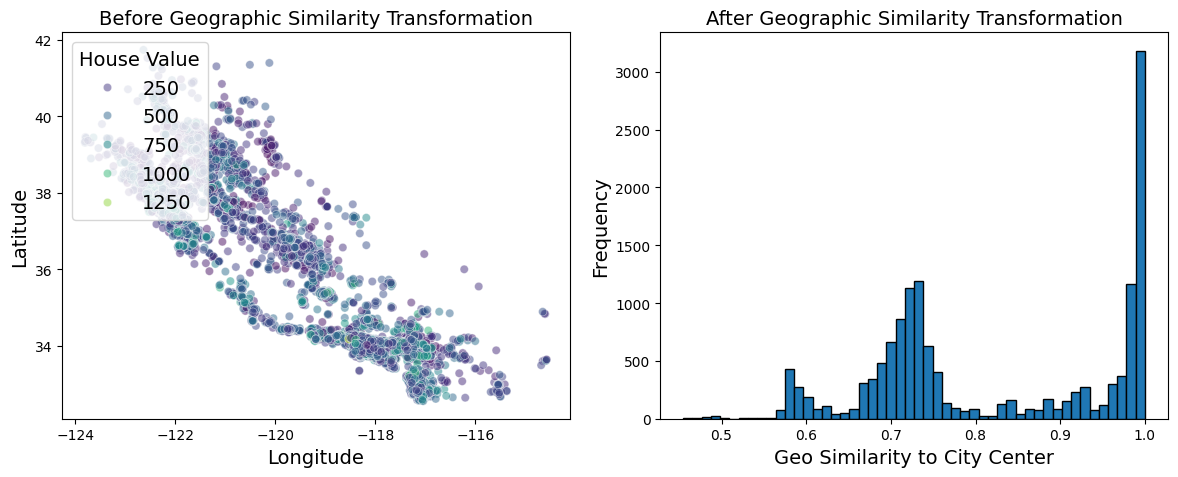

In [90]:
import seaborn as sns

# Before transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=housing['longitude'], y=housing['latitude'], hue=housing['households'], palette='viridis', alpha=0.5)
plt.title('Before Geographic Similarity Transformation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='House Value', loc='upper left')

# After transformation
plt.subplot(1, 2, 2)
plt.hist(housing['geo_similarity_to_city_center'], bins=50, edgecolor='black')
plt.title('After Geographic Similarity Transformation')
plt.xlabel('Geo Similarity to City Center')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Geographical Distribution Before Transformation:**

Spatial Patterns: The scatter plot shows the spatial distribution of house values based on their latitude and longitude. There is a clear clustering of values in specific geographical regions.

House Value Gradients: The color encoding indicates that higher house values (lighter colors) are concentrated in certain areas, while lower values (darker colors) are spread out across other regions.

**Distribution After Transformation:**

Similarity Measure: The histogram represents the distribution of the similarity of each location to the city center (San Francisco coordinates: 37.7749, -122.4194).

Bimodal Distribution: The geo_similarity_to_city_center feature shows a bimodal distribution, with two peaks around 0.7 and 1.0. This indicates that there are two main groups of districts: those that are moderately similar to the city center and those that are highly similar.

**Insights:**

High Similarity: A significant number of districts have a high similarity to the city center, as indicated by the peak around 1.0. These are likely to be urban or central districts.

Moderate Similarity: The peak around 0.7 suggests a group of districts that are moderately close to the city center, possibly representing suburban areas.

Lower Similarity: The lower frequencies at values below 0.7 indicate districts that are geographically farther from the city center.


**Square Root Transformation:** Apply a square root transformation to population to normalize its distribution.

Purpose: Normalize the distribution of the population feature.

In [83]:
# Define the square root transformer
sqrt_transformer = FunctionTransformer(np.sqrt)

# Apply the square root transformer to 'population'
housing['sqrt_population'] = sqrt_transformer.transform(housing[['population']])


<ipython-input-83-4286815e2e01>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['sqrt_population'] = sqrt_transformer.transform(housing[['population']])


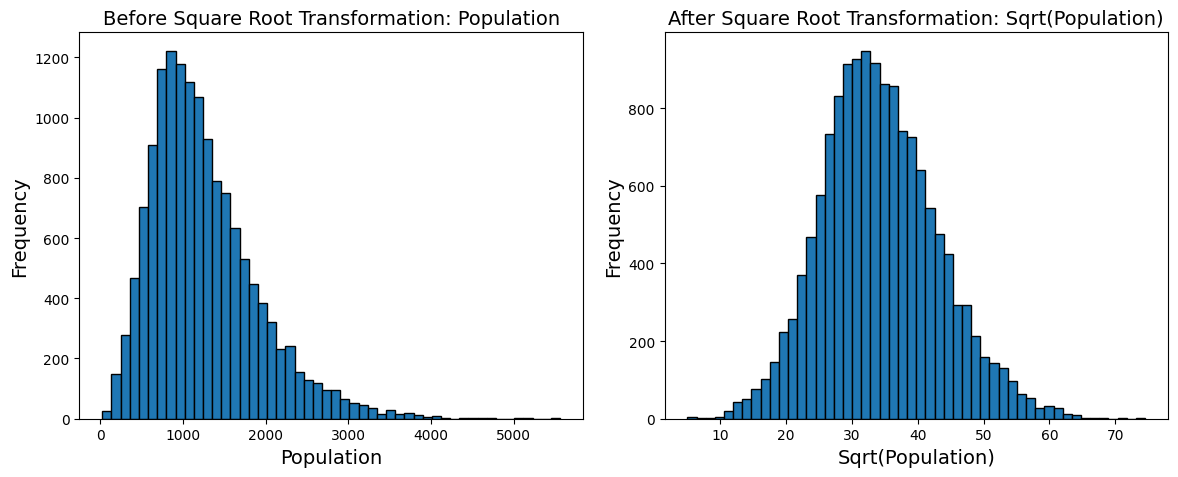

In [84]:
# Before transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(housing['population'], bins=50, edgecolor='black')
plt.title('Before Square Root Transformation: Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

# After transformation
plt.subplot(1, 2, 2)
plt.hist(housing['sqrt_population'], bins=50, edgecolor='black')
plt.title('After Square Root Transformation: Sqrt(Population)')
plt.xlabel('Sqrt(Population)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Distribution Before Transformation:**

Right-Skewed Distribution: The histogram of the population feature is right-skewed. Most values are concentrated between 0 and 2000, with a long tail extending to higher population values.

Outliers: There are some districts with extremely high populations, which are represented as outliers on the right side of the histogram.

**Distribution After Transformation:**

Normalization Effect: The square root transformation compresses the range of the population values, reducing the skewness and bringing the distribution closer to normal. The resulting distribution is more symmetric.

Reduced Impact of Outliers: The effect of extremely high population values is diminished, as the transformation compresses large values more than smaller ones. This makes the distribution more manageable for modeling.

Peak Shift: The peak of the distribution is now around the square root of the previous peak, reflecting the transformation.

**Insights:**

Central Tendency: The central tendency of the population distribution is more apparent after the transformation. The majority of the districts have population values concentrated around the transformed peak.

Distribution Spread: The spread of the population values is more uniform, with fewer extreme values distorting the overall pattern.

Clustering-based Feature: Create a feature based on clustering districts into groups.

Purpose: Cluster districts into groups and create a new feature indicating the cluster.



In [85]:
from sklearn.cluster import KMeans

# Define the KMeans clustering model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model and predict clusters based on 'latitude' and 'longitude'
housing['location_cluster'] = kmeans.fit_predict(housing[['latitude', 'longitude']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-85-298bfc2d0e3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['location_cluster'] = kmeans.fit_predict(housing[['latitude', 'longitude']])


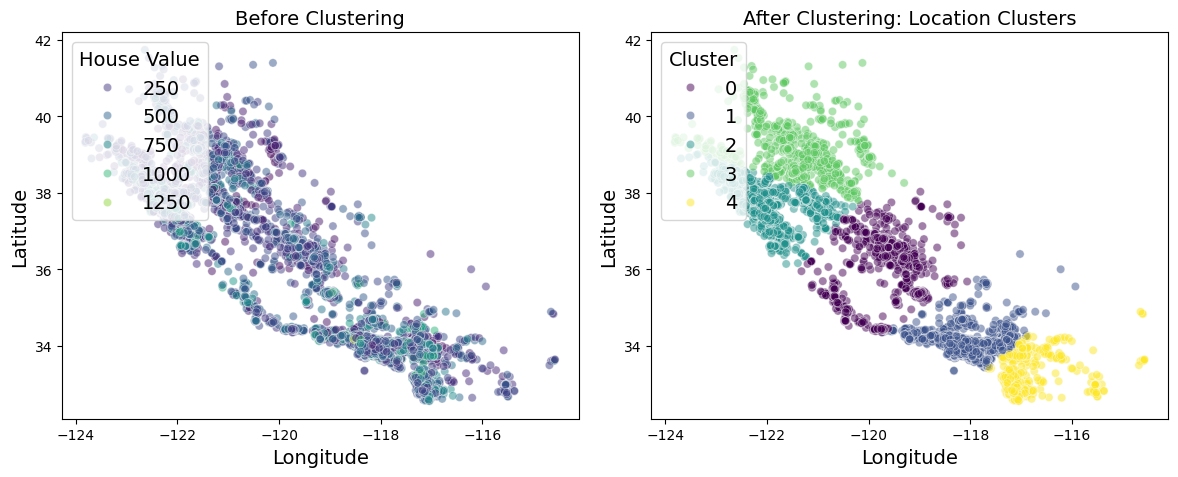

In [91]:
# Before transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=housing['longitude'], y=housing['latitude'], hue=housing['households'], palette='viridis', alpha=0.5)
plt.title('Before Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='House Value', loc='upper left')

# After transformation
plt.subplot(1, 2, 2)
sns.scatterplot(x=housing['longitude'], y=housing['latitude'], hue=housing['location_cluster'], palette='viridis', alpha=0.5)
plt.title('After Clustering: Location Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='upper left')

plt.tight_layout()
plt.show()


**Geographical Distribution Before Transformation:**

Spatial Patterns: The scatter plot shows the spatial distribution of house values based on their latitude and longitude. There are clear patterns of clustering where house values vary by location.

House Value Gradients: The color encoding indicates that higher house values (lighter colors) are concentrated in certain areas, while lower values (darker colors) are spread out across other regions.

**Geographical Distribution After Clustering:**

Cluster Identification: The scatter plot shows the geographical regions grouped into clusters (0 to 4). Each cluster represents a group of districts with similar geographic locations.

House Value Correlation: Although the clusters are based on geographic coordinates, the clustering also reveals an implicit correlation with house values. For example, certain clusters might correspond to higher or lower house values.

**Insights:**

Regional Differences: The clusters highlight regional differences in housing characteristics, which can be important for understanding local real estate markets.